In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

dataframe = pd.read_csv('train.csv')


## Análise da base de dados
#### Verificando a ausência de dados

In [2]:
dataframe.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [3]:
dataframe.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Sabendo como aparenta nossa base, podemos seguir observando os tipos de cada coluna para tratamento futuro

In [4]:
dataframe.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [5]:
dataframe.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Como verificamos anteriormente, temos diversas colunas onde seus espaços estão tão vazios que o melhor a se fazer é removermos estes de nossa análise
* Alley
* PoolQC
* Fence
* MiscFeature
* FireplaceQu
* Id

In [6]:
del dataframe['Alley']

In [7]:
del dataframe['PoolQC']

In [8]:
del dataframe['Fence']

In [9]:
del dataframe['MiscFeature']

In [10]:
del dataframe['FireplaceQu']

In [11]:
del dataframe['Id']

#### Pelo boxplot, podemos ver a quantidade de outliers da base, que devem ser tratados assim que identificados

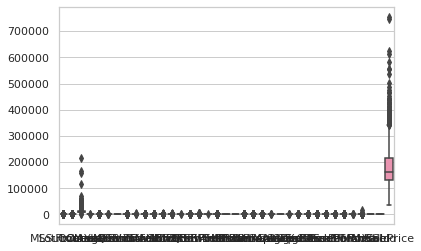

In [12]:
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(data=dataframe);

#### Para tratar os outliers, faremos tratamentos em algumas colunas que possuem seus valores incompletos

### Garage Type

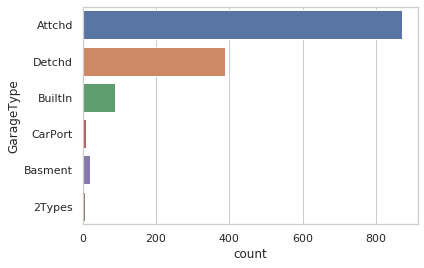

In [13]:
sns.countplot(y='GarageType', data=dataframe);

In [14]:
dataframe['GarageType'].fillna("Attchd",inplace=True)

### Garage Yr Blt
#### Podemos preencher os dados incompletos desta coluna por meio da mediana de seus valores

In [15]:
dataframe.loc[:,"GarageYrBlt"].median()

1980.0

In [16]:
filler = 1980.0
dataframe.loc[dataframe.GarageYrBlt.isnull(), 'GarageYrBlt'] = filler

### Garage Finish
#### Podemos preencher os dados incompletos desta coluna por meio da moda de seus valores

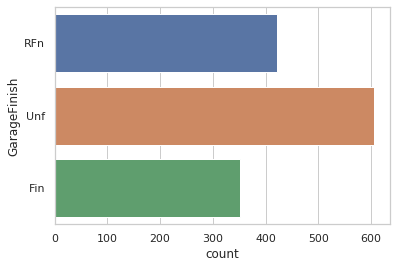

In [17]:
sns.countplot(y='GarageFinish', data=dataframe);

In [18]:
dataframe['GarageFinish'].fillna("Unf",inplace=True)

### Masonry veneer type
#### A partir desta coluna, podemos dizer que o tratamento das próximas foram feitas pela moda ou pela mediana

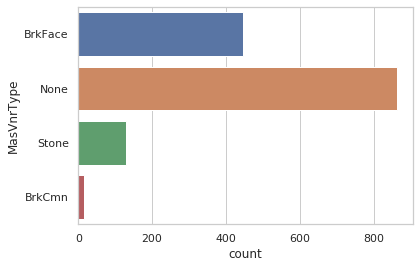

In [19]:
sns.countplot(y='MasVnrType', data=dataframe);

In [20]:
dataframe['MasVnrType'].fillna("None",inplace=True)

### Masonry veneer area in square feet

In [21]:
dataframe.loc[:,"MasVnrArea"].median()

0.0

In [22]:
filler_2 = 0.0
dataframe.loc[dataframe.MasVnrArea.isnull(), 'MasVnrArea'] = filler_2

### Garage quality

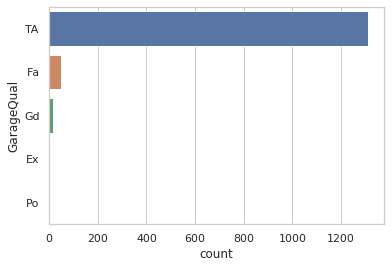

In [23]:
sns.countplot(y='GarageQual', data=dataframe);

In [24]:
dataframe['GarageQual'].fillna("TA",inplace=True)

### Garage condition

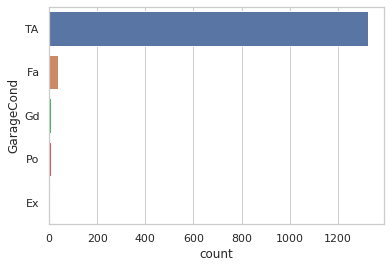

In [25]:
sns.countplot(y='GarageCond', data=dataframe);

In [26]:
dataframe['GarageCond'].fillna("TA",inplace=True)

#### Verificamos se ainda existem valores nulos presentes em alguma coluna

In [27]:
dataframe.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 75, dtype: int64

### Lot Frontage

In [28]:
dataframe.loc[:,"LotFrontage"].median()

69.0

In [29]:
filler_3 = 69.0
dataframe.loc[dataframe.LotFrontage.isnull(), 'LotFrontage'] = filler_3

### Basement Quality

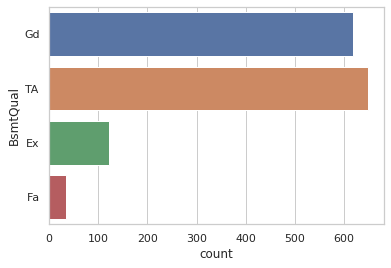

In [30]:
sns.countplot(y='BsmtQual', data=dataframe);

In [31]:
dataframe['BsmtQual'].fillna("TA",inplace=True)

### Basement Condition

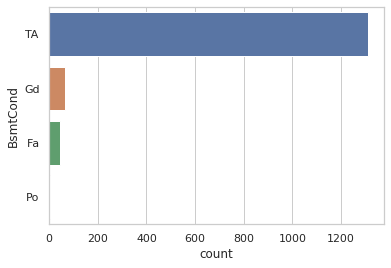

In [32]:
sns.countplot(y='BsmtCond', data=dataframe);

In [33]:
dataframe['BsmtCond'].fillna("TA",inplace=True)

#### Checamos novamente as colunas com valores nulos

In [34]:
dataframe.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

#### Utilizando outra maneira de observar dados não nulos, já que existem muitas colunas

In [35]:
null_columns=dataframe.columns[dataframe.isnull().any()]

In [36]:
print(dataframe[dataframe.isnull().any(axis=1)][null_columns].head())

    BsmtExposure BsmtFinType1 BsmtFinType2 Electrical
17           NaN          NaN          NaN      SBrkr
39           NaN          NaN          NaN      FuseP
90           NaN          NaN          NaN      FuseA
102          NaN          NaN          NaN      SBrkr
156          NaN          NaN          NaN      FuseF


#### Verificamos quantos valores nulos existem para decidir qual tratamento será utilizado

In [37]:
dataframe['BsmtExposure'].isnull().sum()

38

In [38]:
dataframe['BsmtFinType1'].isnull().sum()

37

In [39]:
dataframe['BsmtFinType2'].isnull().sum()

38

In [40]:
dataframe['Electrical'].isnull().sum()

1

#### Como são poucos valores nulos, podemos cogitar preencher estes dados, após analisar cada coluna individualmente

### Basement Exposure

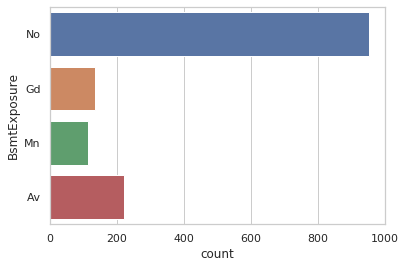

In [41]:
sns.countplot(y='BsmtExposure', data=dataframe);

In [42]:
dataframe['BsmtExposure'].fillna("No",inplace=True)

### Basement Finished Area Type 1

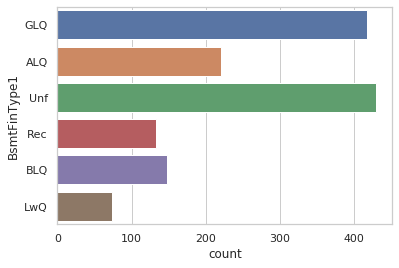

In [43]:
sns.countplot(y='BsmtFinType1', data=dataframe);

In [44]:
dataframe['BsmtFinType1'].fillna("Unf",inplace=True)

### Basement Finished Area Type 2

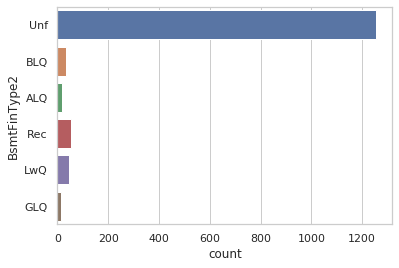

In [45]:
sns.countplot(y='BsmtFinType2', data=dataframe);

In [46]:
dataframe['BsmtFinType2'].fillna("Unf",inplace=True)

### Electrical

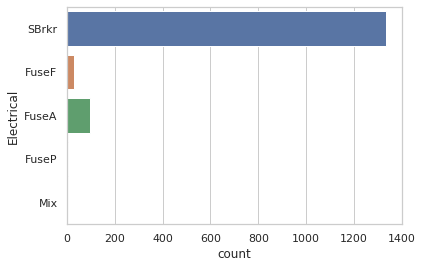

In [47]:
sns.countplot(y='Electrical', data=dataframe);

#### Como em Electrical possui apenas um valor nulo, foi decidido que é melhor retirar o correspondente deste valor nulo

In [48]:
print(dataframe[dataframe["Electrical"].isnull()][null_columns])

     BsmtExposure BsmtFinType1 BsmtFinType2 Electrical
1379           No          Unf          Unf        NaN


In [49]:
dataframe = dataframe.drop(1379)

In [50]:
dataframe['BsmtExposure'].isnull().sum()

0

In [51]:
dataframe['BsmtFinType1'].isnull().sum()

0

In [52]:
dataframe['BsmtFinType2'].isnull().sum()

0

In [53]:
dataframe['Electrical'].isnull().sum()

0

In [54]:
print(dataframe[dataframe.isnull().any(axis=1)][null_columns].head())

Empty DataFrame
Columns: [BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical]
Index: []


In [55]:
dataframe.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,56.881426,69.861549,10517.363948,6.100069,5.575737,1971.244003,1984.850583,103.187800,443.943797,46.581220,...,94.240576,46.692255,21.969157,3.411926,15.071282,2.760795,43.518849,6.322824,2007.815627,180930.394791
std,42.310746,22.035077,9984.666267,1.383171,1.113079,30.199555,20.644343,180.773158,456.106417,161.369977,...,125.381679,66.267472,61.137400,29.327247,55.775138,40.191018,496.291826,2.704331,1.328542,79468.964025
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7549.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129950.000000
50%,50.000000,69.000000,9477.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,384.000000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11603.000000,7.000000,6.000000,2000.000000,2004.000000,164.500000,712.500000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [56]:
df = pd.DataFrame(dataframe)
corr = df.corr()
corr.style.background_gradient().set_precision(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1,-0.36,-0.14,0.033,-0.059,0.027,0.04,0.024,-0.07,-0.066,-0.14,-0.24,-0.25,0.31,0.047,0.075,0.0038,-0.0022,0.13,0.18,-0.024,0.28,0.04,-0.045,0.081,-0.04,-0.099,-0.013,-0.0058,-0.012,-0.044,-0.026,0.0083,-0.0077,-0.013,-0.021,-0.084
LotFrontage,-0.36,1,0.3,0.23,-0.053,0.12,0.083,0.18,0.21,0.042,0.12,0.36,0.41,0.072,0.037,0.37,0.09,-0.007,0.18,0.047,0.24,-0.0049,0.32,0.23,0.063,0.27,0.32,0.076,0.14,0.01,0.062,0.038,0.18,-0.00025,0.01,0.0064,0.33
LotArea,-0.14,0.3,1,0.11,-0.0057,0.014,0.014,0.1,0.21,0.11,-0.0026,0.26,0.3,0.051,0.0048,0.26,0.16,0.048,0.13,0.014,0.12,-0.018,0.19,0.27,-0.026,0.15,0.18,0.17,0.085,-0.018,0.02,0.043,0.078,0.038,0.0012,-0.014,0.26


#### Removendo as colunas que não tem correlação com SalePrice

In [57]:
del dataframe['MSSubClass']

In [58]:
del dataframe['OverallCond']

In [59]:
del dataframe['BsmtFinSF2']

In [60]:
del dataframe['LowQualFinSF']

In [61]:
del dataframe['BsmtHalfBath']

In [62]:
del dataframe['KitchenAbvGr']

In [63]:
del dataframe['EnclosedPorch']

In [64]:
del dataframe['PoolArea']

In [65]:
del dataframe['MiscVal']

In [66]:
del dataframe['YrSold']

#### Utilizando o OneHotEncoder para conversão de dados para números

In [67]:
one_hot_cols = dataframe.columns.tolist()
one_hot_cols.remove('SalePrice')
df_bin_enc = pd.get_dummies(dataframe, columns=one_hot_cols)

df_bin_enc.head()

,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotFrontage_21.0,LotFrontage_24.0,LotFrontage_30.0,LotFrontage_32.0,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,208500,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,181500,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,223500,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,140000,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,250000,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


## Inicio do treinamento

In [68]:
from sklearn.model_selection import train_test_split

train = df_bin_enc
X = train.drop(columns=['SalePrice'])
y = train.SalePrice
X.shape

(1459, 7256)

#### Dividimos a base para 80% de treinamento e 20% de teste

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [70]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()  
regressor.fit(X_test, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
print(regressor.intercept_)
print(regressor.coef_)

190917.1532027695
[-2322.07043699 -2046.70180059   840.80714101 ...  2908.23780164
 -6676.46651675  8189.60732032]


In [72]:
#y_pred = regressor.predict(X_test)

In [73]:
#from sklearn.metrics import accuracy_score
#print('Acurácia: ', round(accuracy_score(y_test,y_pred),2)) 